In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import os
import soundfile
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from opensoundscape.audio import Audio
from opensoundscape.spectrogram import Spectrogram
from PIL import Image
from sklearn.metrics import accuracy_score
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
sc = StandardScaler()
enc = LabelEncoder()
mms = MinMaxScaler()
oh = OneHotEncoder()
sns.set_style('darkgrid')

In [5]:
file_paths = []

emotions_encoder = {

    '01': 'Neutral',
    '02': 'Calm',
    '03': 'Happy',
    '04': 'Sad',
    '05': 'Angry',
    '06': 'Fearful',
    '07': 'Disgust',
    '08': 'Surprised'

}

emotions = []

gender = []

statement = []

folder = 'E:\Storage\PRML\Course Project\Speech_Emotion_Recognition\Data'

for i in range(24):

    subfolder = f"Actor_{str(i+1).zfill(2)}"

    directory = os.path.join(folder,subfolder)

    for filename in os.listdir(directory):

        path_file = os.path.join(directory,filename)

        file_paths.append(path_file)

        emotions.append(emotions_encoder[(filename.split('-')[2])])

        statement.append(int(filename.split('-')[4]))

        gender.append(i%2)

Data = pd.DataFrame(np.c_[file_paths,emotions,gender,statement],columns=['Path','Emotion','Gender','Statement'],).sample(frac=1).reset_index(inplace=False).drop(columns='index')

Data.head()


,Path,Emotion,Gender,Statement
0,E:\Storage\PRML\Course Project\Speech_Emotion_...,Happy,0,2
1,E:\Storage\PRML\Course Project\Speech_Emotion_...,Sad,1,2
2,E:\Storage\PRML\Course Project\Speech_Emotion_...,Angry,1,1
3,E:\Storage\PRML\Course Project\Speech_Emotion_...,Calm,0,2
4,E:\Storage\PRML\Course Project\Speech_Emotion_...,Surprised,0,1


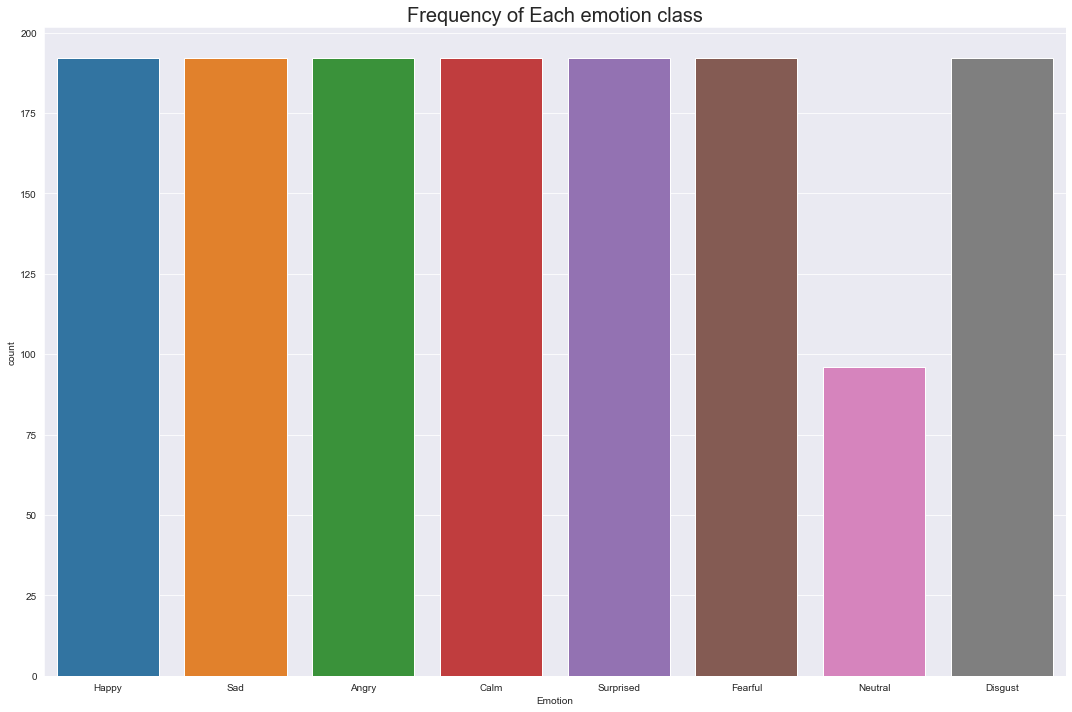

In [6]:
plt.figure("The counts of Each emotion category in Dataset",(15,10))

sns.countplot(x = Data.Emotion)

plt.title("Frequency of Each emotion class",fontdict={'fontsize': 20})

plt.tight_layout()

plt.show()

In [7]:
def wavplot(path,figsize=(15,5)):

    aud, sr = librosa.load(path=path,duration=2.1,offset=0.6)

    plt.figure(figsize=figsize)

    plt.plot(aud)

    plt.tight_layout()

    plt.show()

def specplot(path,figsize=(15,5)):

    aud, sr = librosa.load(path=path,duration=2.1,offset=0.6)

    X = abs(librosa.stft(aud))

    db = librosa.amplitude_to_db(X)

    plt.figure(figsize=figsize)

    librosa.display.specshow(db,sr=sr)

    plt.savefig("y.png")

    plt.show()

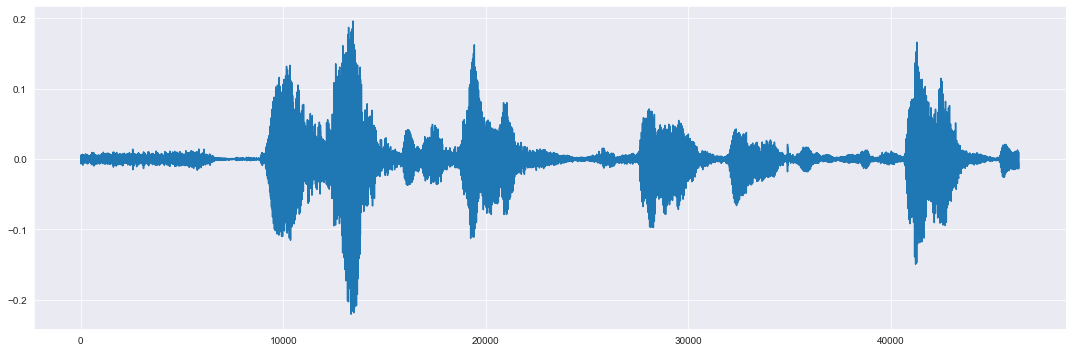

In [8]:
wavplot(Data.Path[1])

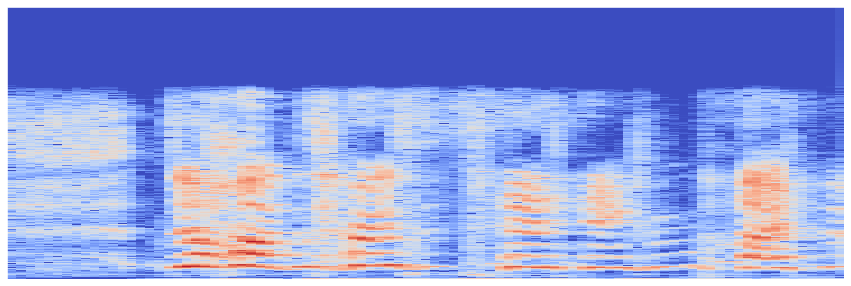

In [9]:
specplot(Data.Path[1])

In [10]:
aud, sr = librosa.load(Data.Path[929],duration=2.5,offset=0.6)

X = abs(librosa.stft(aud))

mel = librosa.feature.mfcc(y=aud,n_mfcc=50)

Chroma = librosa.feature.chroma_stft(S=X,sr=sr,n_chroma=50)

Chr = np.argmax(Chroma,axis=0).tolist()

freq = np.zeros(12,dtype=int)

for i in range(12):

    freq[i] += Chr.count(i+1)



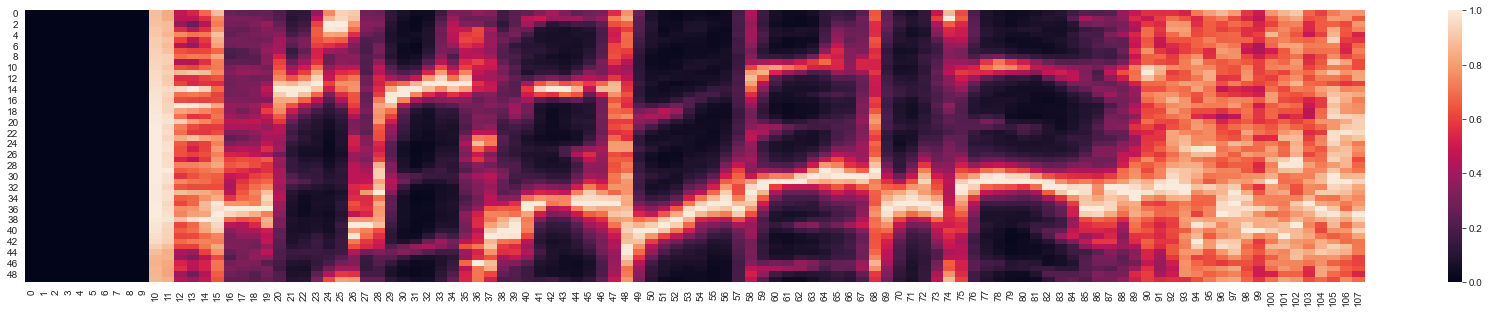

In [11]:
plt.figure(figsize=(30,5))

sns.heatmap(Chroma)

plt.show()

In [12]:
Chroma.shape

(50, 108)

In [13]:
class Augment():

    def __init__(self):

        pass

    def load(self,path):

        aud, sr = librosa.load(path=path,duration=2.5,offset=0.5)

        self.aud = aud

        self.sampling_rate = sr

    def noise(self,path):

        self.load(path)

        aud = self.aud
        
        noise_amp = 0.035*np.random.uniform()*np.amax(aud)
        
        aud = aud + noise_amp*np.random.normal(size=aud.shape[0])
        
        return aud

    def time_stretch(self,path, rate=0.6):

        self.load(path)

        aud = self.aud

        return librosa.effects.time_stretch(aud, rate)

    def time_roll(self,path):

        self.load(path)

        aud = self.aud

        shift_range = int(np.random.uniform(low=-5, high = 5)*1000)

        return np.roll(aud, shift_range)

    def pitch(self,path, pitch_factor=0.6):

        self.load(path)

        aud = self.aud

        sampling_rate = self.sampling_rate

        return librosa.effects.pitch_shift(aud, sampling_rate, pitch_factor)

    def get_methods(self,Data,methods=[]):

        noised = []

        stretched = []

        rolled = []

        pitched = []

        for path in Data.Path:

            noised.append(self.noise(path))

            stretched.append(self.time_stretch(path))

            rolled.append(self.time_roll(path))

            pitched.append(self.pitch(path))

        return noised,stretched,rolled,pitched


aug = Augment()

In [14]:
D_noised,D_stretched,D_rolled,D_pitched = aug.get_methods(Data=Data)

KeyboardInterrupt: 

In [43]:
D_noised

[array([ 5.32546567e-05,  2.48453738e-05,  8.01753793e-05, ...,
         2.30845121e-05,  2.45978212e-06, -1.21996043e-04]),
 array([-3.01242220e-04, -1.57859666e-04, -6.29585392e-04, ...,
         3.28839311e-04, -4.13353269e-04, -4.82365738e-05]),
 array([ 0.00253688,  0.00221991,  0.00075621, ..., -0.00184329,
         0.00458621, -0.00331621]),
 array([ 0.00215002, -0.0004203 ,  0.00198064, ...,  0.0006409 ,
        -0.00020904, -0.00098168]),
 array([-0.0010474 , -0.00166729,  0.00055023, ..., -0.00041291,
        -0.00105824,  0.00133411]),
 array([-0.00021081,  0.00743651, -0.00746849, ...,  0.00261552,
        -0.00385765, -0.0003399 ]),
 array([-7.05058537e-05, -2.60088253e-05, -1.70583183e-05, ...,
        -9.66007503e-05, -1.02116428e-04,  1.00474311e-04]),
 array([ 0.00174787, -0.00230591,  0.0062699 , ...,  0.04616777,
         0.06903027,  0.03872605]),
 array([-0.00187805,  0.0002422 , -0.000418  , ..., -0.02367226,
        -0.01909368, -0.0126828 ]),
 array([ 0.0001081 

In [25]:
class Preprocess():

    def __init__(self,sr=None):

        self.isLoaded = False

        self.sampling_rate = sr

    def load(self,path):

        aud,sr = librosa.load(path=path,duration=2.5,offset=0.5)

        self.sampling_rate = sr

        self.isLoaded = True

        return aud

    def get_zcr(self,aud = np.array([]),path=None):

        if not self.isLoaded:

            self.load(path=path)

        Z = np.mean(librosa.feature.zero_crossing_rate(y=aud),axis=1)

        return Z

    def get_mfcc(self,aud = np.array([]),path=None):

        if not self.isLoaded:

            self.load(path=path)        

        M = np.mean(librosa.feature.mfcc(y=aud,n_mfcc=50),axis=1)

        return M

    def get_mel(self,aud = np.array([]),path=None):

        if not self.isLoaded:

            self.load(path=path)

        Me = np.mean(librosa.feature.melspectrogram(y=aud,sr=self.sampling_rate,n_fft=2048),axis=1)

        return Me

    def get_chroma_freq(self,aud = np.array([]),path=None):

        if not self.isLoaded:

            self.load(path=path)

        X = abs(librosa.stft(aud))

        Chr = np.argmax(librosa.feature.chroma_stft(S=X,sr=self.sampling_rate,n_chroma=50),axis=0).tolist()

        freq = np.zeros(12,dtype=int)

        for i in range(12):

            freq[i] += Chr.count(i+1)

        return freq

    def get_chroma(self,aud = np.array([]),path=None):

        if not self.isLoaded:

            self.load(path=path)

        X = abs(librosa.stft(aud))

        Chr = np.mean(librosa.feature.chroma_stft(S=X,sr=self.sampling_rate),axis=1)

        return Chr

    def get_meansquared(self,aud = np.array([]),path=None):

        if not self.isLoaded:

            self.load(path=path)

        me = np.sqrt(np.mean(aud**2))

        return me

    def get_spread(self,aud = np.array([]),path=None):

        if not self.isLoaded:

            self.load(path=path)

        var = np.var(aud)

        return var

    def extract_features(self,aud = np.array([]),path=None):

        if not self.isLoaded:

            self.load(path=path)

        # var = int(self.get_spread(aud))

        # me = int(self.get_meansquared(aud))

        # Chr = self.get_chroma(aud).ravel()

        # Me = self.get_mel(aud).ravel()

        M = self.get_mfcc(aud).ravel()

        # Z = self.get_zcr(aud).ravel()

        # final = np.r_[Chr,Me,me,var,M,Z]

        return M

feat = Preprocess()

In [40]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=50).T, axis=0)
            print(mfccs.shape)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate,n_chroma=50).T,axis=0)
            print(chroma.shape)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            print(mel.shape)
            result=np.hstack((result, mel))
    return result

In [41]:
emotions = {
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions = [x for x in emotions.values()]

In [42]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("Data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=5322)

In [43]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)
(128,)
(50,)
(50,)


In [26]:
x1 = []

for path in Data.Path:

    x1.append(list(feat.extract_features(feat.load(path))))

X = np.array(x1)

Y = enc.fit_transform(emotions).reshape(-1,1)

Yoh = oh.fit_transform(Y).toarray()

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,shuffle=True,random_state=42,train_size=0.7)

yotrain,yotest = oh.transform(ytrain).toarray(),oh.transform(ytest).toarray()


In [58]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,16), learning_rate='adaptive', max_iter=500)

mlp.fit(sc.fit_transform(x_train),y_train)

res= mlp.predict(sc.transform(x_test))

accuracy_score(res,y_test)

0.575

### Multinomial Bayes

In [14]:
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPooling2D,InputLayer,BatchNormalization,Flatten,Dropout,Conv1D,MaxPooling1D,LSTM,Attention
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.activations import relu,softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.losses import categorical_crossentropy
from tensorflow import one_hot
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [15]:
xtrain = xtrain.reshape(-1,91,1)
xtest = xtest.reshape(-1,91,1)

In [16]:
model = Sequential()

model.add(InputLayer(input_shape=(91,1)))

model.add(Conv1D(256,3,padding="same",activation=relu))

model.add(Conv1D(256,3,padding="same",activation=relu))

model.add(Dropout(0.25))

# model.add(BatchNormalization())

# model.add(MaxPooling1D(pool_size=4,strides=2))

# model.add(Conv1D(128,3,padding="same",activation=relu))

# model.add(Conv1D(128,3,padding="same",activation=relu))

# model.add(Dropout(0.25))

# model.add(BatchNormalization())

# model.add(MaxPooling1D(strides=2,pool_size=4))

# model.add(Conv1D(64,3,padding="same",activation=relu))

# model.add(Conv1D(64,3,padding="same",activation=relu))

# model.add(Dropout(0.25))

# model.add(BatchNormalization())

# model.add(MaxPooling1D(strides=2,pool_size=4))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(32,activation=relu))

model.add(Dense(16,activation=relu))

model.add(Dense(1,activation=softmax))

model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics="accuracy")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 91, 256)           1024      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 91, 256)           196864    
_________________________________________________________________
dropout (Dropout)            (None, 91, 256)           0         
_________________________________________________________________
flatten (Flatten)            (None, 23296)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23296)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                745504    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                5

In [17]:
model.fit(x=xtrain,y=yotrain,epochs=100,validation_data=(xtest,yotest))

Epoch 1/100
 2/32 [>.............................] - ETA: 1s - loss: 2.8273 - accuracy: 0.1719

C:\Users\Aaditya Baranwal\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


32/32 [==============================] - 2s 63ms/step - loss: 2.1809 - accuracy: 0.1291 - val_loss: 2.0695 - val_accuracy: 0.1570
Epoch 2/100
32/32 [==============================] - 2s 63ms/step - loss: 2.0773 - accuracy: 0.1331 - val_loss: 2.0541 - val_accuracy: 0.1570
Epoch 3/100
32/32 [==============================] - 2s 63ms/step - loss: 2.0711 - accuracy: 0.1301 - val_loss: 2.0653 - val_accuracy: 0.1409
Epoch 4/100
32/32 [==============================] - 2s 64ms/step - loss: 2.0696 - accuracy: 0.1450 - val_loss: 2.0694 - val_accuracy: 0.1085
Epoch 5/100
32/32 [==============================] - 2s 63ms/step - loss: 2.0685 - accuracy: 0.1261 - val_loss: 2.0646 - val_accuracy: 0.1339
Epoch 6/100
32/32 [==============================] - 2s 64ms/step - loss: 2.0702 - accuracy: 0.1291 - val_loss: 2.0638 - val_accuracy: 0.1085
Epoch 7/100
32/32 [==============================] - 2s 63ms/step - loss: 2.0649 - accuracy: 0.1360 - val_loss: 2.0597 - val_accuracy: 0.1293
Epoch 8/100
32/32 

In [18]:
from lightgbm import LGBMClassifier
lgm = LGBMClassifier()

In [22]:
lgm.fit(xtrain,ytrain)

C:\Users\Aaditya Baranwal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aaditya Baranwal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier()

In [24]:
res = lgm.predict(xtest)

In [25]:
accuracy_score(res,ytest.ravel())

0.13856812933025403

In [ ]:
def LSTM_model():

    modle = LS